# Laboratorium 9 - MOwNiT2

<br> https://github.com/piotrMocz/mownit2/blob/master/Lab6.ipynb

## Regresja liniowa z regularyzacją

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from pandas import Series
from sklearn import linear_model, metrics

### Zadanie rozgrzewkowe
Napisać regresję dla wielu wymiarów.

In [2]:
def gradient_descent(X, y, theta, alpha, it):
    tmp = np.matrix(np.zeros(theta.shape))
    prms = int(theta.ravel().shape[1])
    cost = np.zeros(it)
    
    for i in range(it):
        err = (theta.T * X) - y
        for j in range (prms):
            tmp[0][j] = theta[0][j] - ((alpha / len(X))) * np.sum(np.multiply(err, X[:,j]))
        theta = tmp
        cost[i] = np.sum(np.power(((X * theta.T) - y), 2)) / (2 * len(X))
    
    return theta, cost

### Duże zadanie/mały projekt
Zadanie jest z gatunku życiowych, tudzież: przydatnych w karierze zawodowej, więc warto go nie lekceważyć. Będziemy chcieli zrobić coś, co jest chlebem powszednim data scientistów:
0. znaleźć dane
1. wczytać dane do data frame'u
2. wstępnie opisać dane i ew. uzupełnić brakujące
3. narysować wykresy i wypisać podstawowe statystyki
4. wstępnie przetworzyć dane
5. wytrenować modele (zwykła regresja, Lasso, Ridge i dowolny inny model) i sprawdzić ich wydajność

#### 0. znalezienie danych
Dobre będą dla nas jakiekolwiek dane tabelaryczne. Dużo ciekawych danych (a przede wszystkim: konkursów z nimi związanych) można znaleźć na Kagglu, np: https://www.kaggle.com/c/ga-customer-revenue-prediction. Oczywiście są też inne ciekawe strony z danymi, jak choćby https://www.drivendata.org/competitions/.

Wybrałem następujące dane: Barcelona data sets - Accidents 2017
<br>https://www.kaggle.com/xvivancos/barcelona-data-sets

#### 1. Ładowanie danych
Dane najlepiej załadować do struktury takiej, jak [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Oczywiście można radzić sobie inaczej, ale chyba nie warto.

In [3]:
data = pd.read_csv("accidents_2017.csv", index_col=0)

In [4]:
data.shape

(10339, 14)

In [5]:
data.head()

,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
Id,,,,,,,,,,,,,,
2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


#### 2. Wstępne opisanie danych i brakujące wartości
Za pomocą metody takiej, jak [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) warto zbadać, co faktycznie jest w dataframie. Często chcemy się pozbyć brakujących danych (choć niektóre metody sobie z nimi nieźle radzą). Praca z brakującymi danymi dobrze opisana jest [tutaj](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

In [6]:
data = data.dropna()
data.shape

(10339, 14)

In [7]:
data.describe(include = 'all')

,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
count,10339,10339,10339,10339,10339,10339.000000,10339.000000,10339,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
unique,11,74,4253,7,12,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Eixample,la Dreta de l'Eixample,Corts Catalanes ...,Friday,November,NaN,NaN,Afternoon,NaN,NaN,NaN,NaN,NaN,NaN
freq,3029,1167,219,1761,991,NaN,NaN,5082,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.775994,13.811394,NaN,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346
std,NaN,NaN,NaN,NaN,NaN,8.763455,5.316490,NaN,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094
25%,NaN,NaN,NaN,NaN,NaN,8.000000,10.000000,NaN,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288
50%,NaN,NaN,NaN,NaN,NaN,16.000000,14.000000,NaN,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730
75%,NaN,NaN,NaN,NaN,NaN,23.000000,18.000000,NaN,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038


#### 3. Rysowanie wykresów
Dużo metod lepiej działa na "ładnych" danych. Nie mamy już co prawda brakujących wartości, ale to 1/3 sukcesu. W wielu przypadkach chcemy też pozbyć się "outlierów" (przykładowo, jeśli przewidujemy ceny mieszkań i widzimy, że mamy jedno o powierzchni powyżej 10000m^2 i astronomicznej cenie, co zaburza nam wszystkie statystyki). Równie niechętnie patrzymy na skośne rozkłady -- w idealnym świecie wszystkie przypominałyby rozkład normalny. Warto pomyśleć o zlogarytmowaniu całej kolumny, to często pomaga. Wykresy, a zwłaszcza [histogramy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist), pomagają nam lepiej poznać rozkłady poszczególnych kolumn.

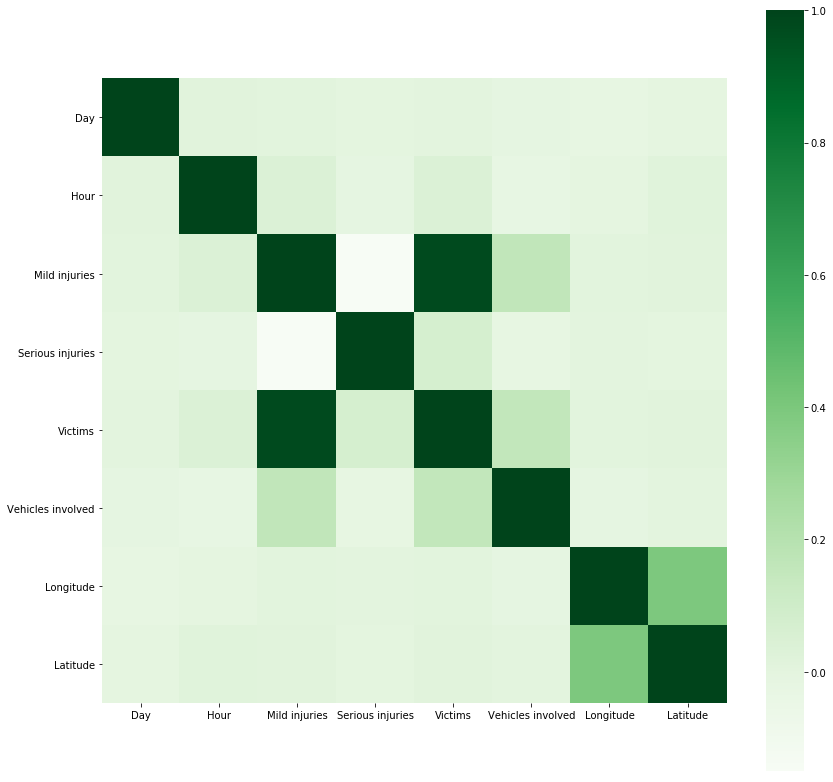

In [8]:
correlation = data.corr()

fig = plt.subplots(figsize=(14,14))
sns.heatmap(correlation, vmax=1, square=True, cmap='Greens')

In [9]:
df = data[['Mild injuries', 'Victims', 'Vehicles involved', 'Latitude', 'Longitude']]
df.describe()

,Mild injuries,Victims,Vehicles involved,Latitude,Longitude
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,1.154174,1.178644,1.920979,41.399346,2.162832
std,0.742294,0.735145,0.714011,0.021251,0.024176
min,0.000000,0.000000,0.000000,41.323094,2.091855
25%,1.000000,1.000000,2.000000,41.386288,2.144985
50%,1.000000,1.000000,2.000000,41.396730,2.163399
75%,1.000000,1.000000,2.000000,41.411038,2.180179
max,10.000000,10.000000,14.000000,41.468244,2.222572


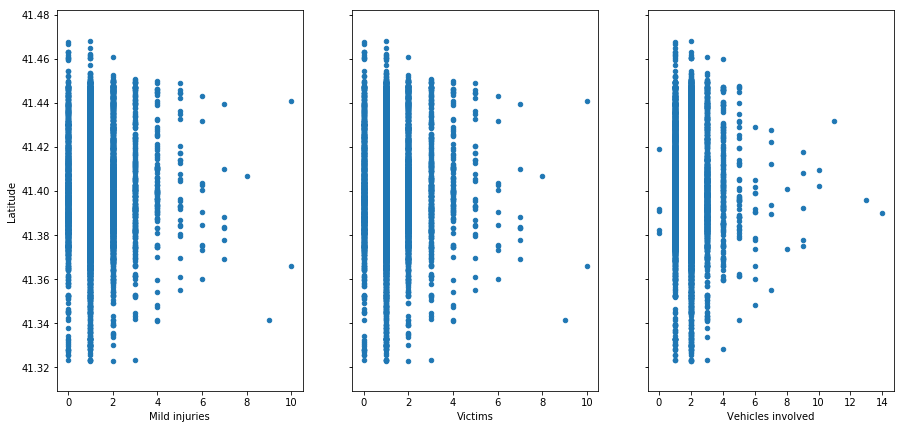

In [10]:
figure, axs = plt.subplots(1, 3, sharey = True)
df.plot(kind = 'scatter', x = 'Mild injuries', y = 'Latitude', ax = axs[0], figsize=(15, 7))
df.plot(kind = 'scatter', x = 'Victims', y = 'Latitude', ax = axs[1])
df.plot(kind = 'scatter', x = 'Vehicles involved', y = 'Latitude', ax = axs[2])

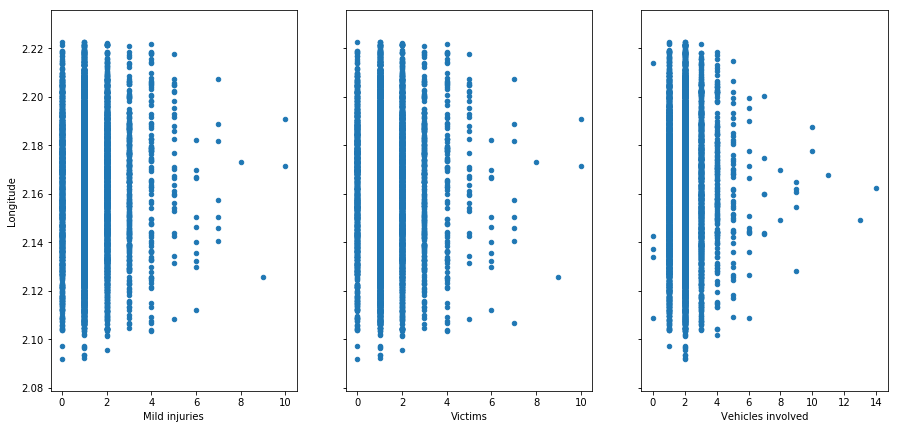

In [11]:
figure, axs = plt.subplots(1, 3, sharey = True)
df.plot(kind = 'scatter', x = 'Mild injuries', y = 'Longitude', ax = axs[0], figsize=(15, 7))
df.plot(kind = 'scatter', x = 'Victims', y = 'Longitude', ax = axs[1])
df.plot(kind = 'scatter', x = 'Vehicles involved', y = 'Longitude', ax = axs[2])

In [12]:
df = df[(df['Mild injuries'] < 8) & (df.Victims < 8) & (df['Vehicles involved'] < 10)]

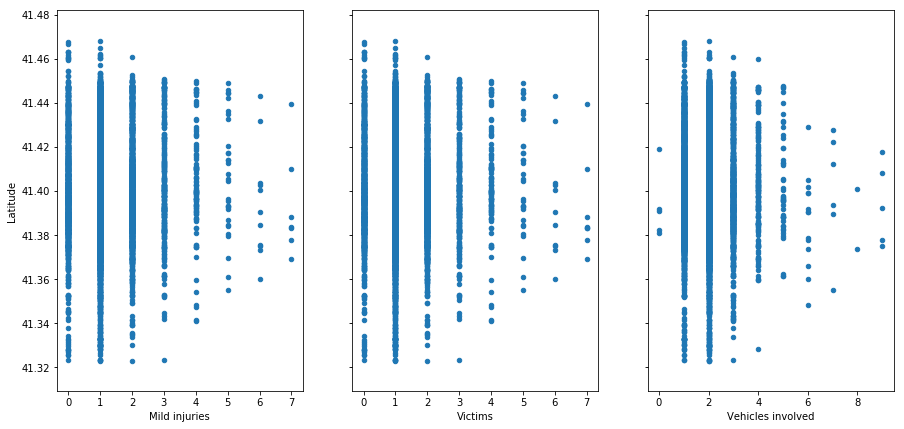

In [13]:
figure, axs = plt.subplots(1, 3, sharey = True)
df.plot(kind = 'scatter', x = 'Mild injuries', y = 'Latitude', ax = axs[0], figsize=(15, 7))
df.plot(kind = 'scatter', x = 'Victims', y = 'Latitude', ax = axs[1])
df.plot(kind = 'scatter', x = 'Vehicles involved', y = 'Latitude', ax = axs[2])

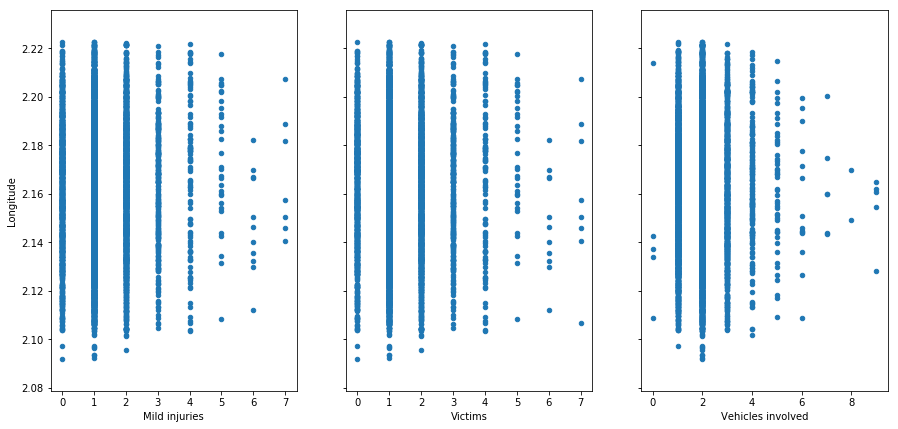

In [14]:
figure, axs = plt.subplots(1, 3, sharey = True)
df.plot(kind = 'scatter', x = 'Mild injuries', y = 'Longitude', ax = axs[0], figsize=(15, 7))
df.plot(kind = 'scatter', x = 'Victims', y = 'Longitude', ax = axs[1])
df.plot(kind = 'scatter', x = 'Vehicles involved', y = 'Longitude', ax = axs[2])

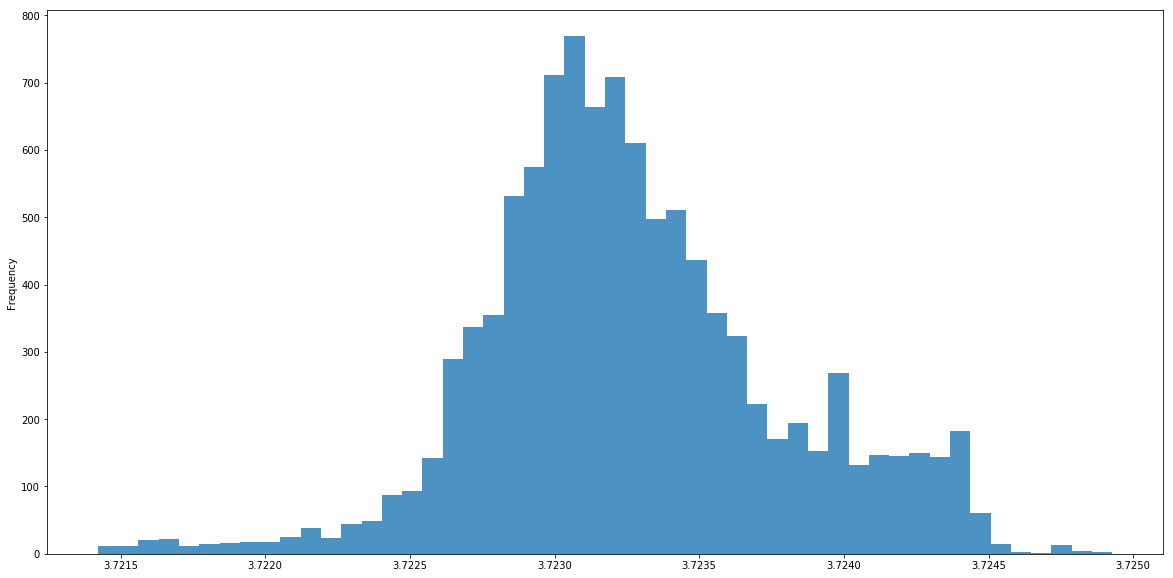

In [15]:
df['Latgitude'] = np.log(df['Latitude'])
df['Latgitude'].plot.hist(bins = 50, alpha = 0.8,  figsize = (20,10))

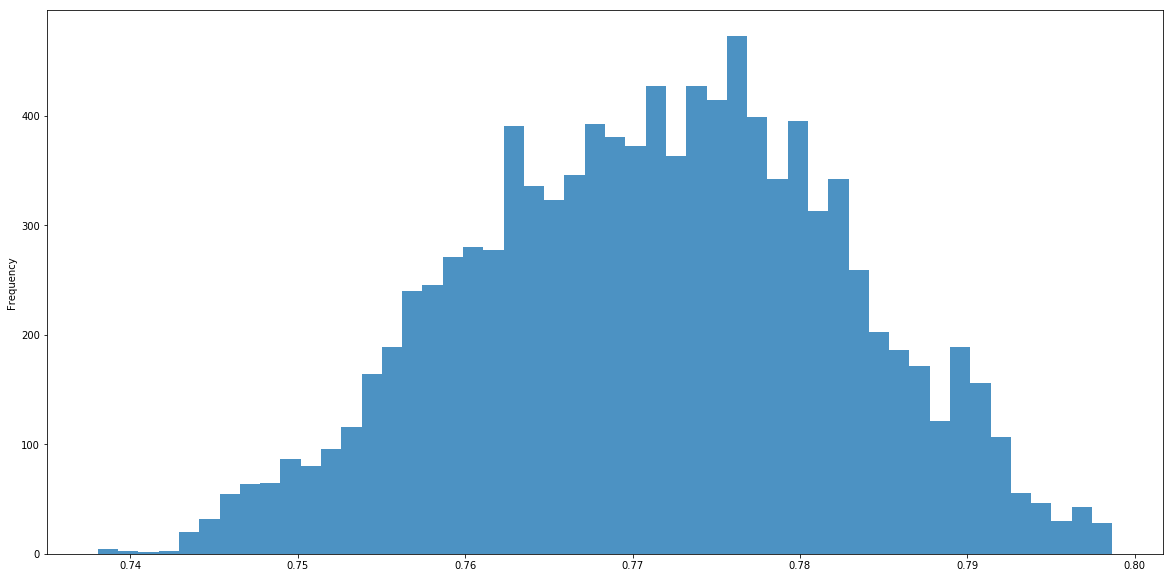

In [16]:
df['Longitude'] = np.log(df['Longitude'])
df['Longitude'].plot.hist(bins = 50, alpha = 0.8,  figsize = (20,10))

#### 4. Przetwarzanie danych
Oprócz usuwania outlierów i prostowania rozkładów możemy chcieć wykonać jeszcze szereg modyfikacji na danych, przykładowo:
* zakodować zmienne kategoryczne jako numerki (https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)
* znormalizować dane
* usunąć szumy
* zmniejszyć wymiarowość

Tutaj użytkownikom Pythona warto polecić moduł [Scikit Learn](https://scikit-learn.org/stable/index.html).

#### 5. trenowanie modeli

Chcemy wytrenować na naszych danych łącznie cztery modele:
* Zwykłą regresję liniową
* Regresję z regularyzacją L1 (Lasso)
* Regresję z regularyzacją L2 (Ridge)
Wszystkie trzy są ładnie opisane [tutaj](https://scikit-learn.org/stable/modules/linear_model.html) oraz w linkach na górze strony.

Warto pamiętać o użyciu [kros-walidacji](https://scikit-learn.org/stable/modules/cross_validation.html) do trenowania modeli.

Będzie nas interesować, oprócz tego, który model osiąga najlepsze wyniki, zależność wyników Lasso i Ridge od doboru parametru regularyzacji (jeśli jest niejasne, jak to należy zrobić, warto zobaczyć kagglowy link z góry strony).

In [17]:
params = ['Mild injuries', 'Victims', 'Vehicles involved']
latitude = ['Latitude']
longitude = ['Longitude']

# training set
X  = df[params][:9500]
Y  = df[latitude][:9500]
Z  = df[longitude][:9500]

# test set
Xt = df[params][9501:]
Yt = df[latitude][9501:]
Zt  = df[longitude][9501:]

##### Regresja liniowa zwykła

In [18]:
lin = linear_model.LinearRegression()
lin.fit(X, Y)
P = lin.predict(Xt)

print("coefficients: ", lin.coef_)
print("mean squared error for test set latitude: ", metrics.mean_squared_error(Yt, P))

coefficients:  [[ 1.17225884e-03 -5.15495112e-04 -4.12003584e-05]]
mean squared error for test set latitude:  0.00056916245945784


In [19]:
lin = linear_model.LinearRegression()
lin.fit(X, Z)
P = lin.predict(Xt)

print("coefficients: ", lin.coef_)
print("mean squared error for test set longitude: ", metrics.mean_squared_error(Zt, P))

coefficients:  [[-0.00031788  0.00055244 -0.00016353]]
mean squared error for test set longitude:  0.00012797109116995833


##### Regresja z regularyzacją L1 (Lasso)

In [20]:
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X, Y)
P = lasso.predict(Xt)

print("coefficients: ", lin.coef_)
print("mean squared error for test set latitude: ", metrics.mean_squared_error(Yt, P))

coefficients:  [[-0.00031788  0.00055244 -0.00016353]]
mean squared error for test set latitude:  0.0005676522993187695


Text(0,0.5,'mean squared error')

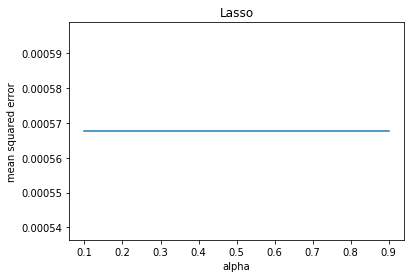

In [21]:
alphas = [x * 0.1 for x in range(1, 10)]
lassos = [metrics.mean_squared_error(linear_model.Lasso(alpha = a).fit(X, Y).predict(Xt), Yt) for a in alphas]
lassos = Series(lassos, index = alphas)
lassos.plot(title = "Lasso")
plt.xlabel("alpha")
plt.ylabel("mean squared error")

In [22]:
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X, Z)
P = lasso.predict(Xt)

print("coefficients: ", lin.coef_)
print("mean squared error for test set longitude: ", metrics.mean_squared_error(Zt, P))

coefficients:  [[-0.00031788  0.00055244 -0.00016353]]
mean squared error for test set longitude:  0.0001277773631951848


Text(0,0.5,'mean squared error')

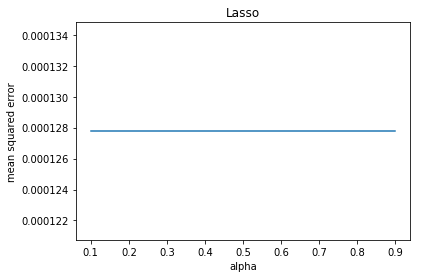

In [23]:
alphas = [x * 0.1 for x in range(1, 10)]
lassos = [metrics.mean_squared_error(linear_model.Lasso(alpha = a).fit(X, Z).predict(Xt), Zt) for a in alphas]
lassos = Series(lassos, index = alphas)
lassos.plot(title = "Lasso")
plt.xlabel("alpha")
plt.ylabel("mean squared error")

##### Regresja z regularyzacją L2 (Ridge)

In [24]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X, Y)
P = ridge.predict(Xt)

print("coefficients: ", lin.coef_)
print("mean squared error for test set latitude: ", metrics.mean_squared_error(Yt, P))

coefficients:  [[-0.00031788  0.00055244 -0.00016353]]
mean squared error for test set latitude:  0.0005691597367608943


Text(0,0.5,'mean squared error')

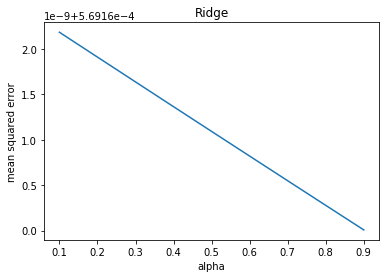

In [25]:
alphas = [x * 0.1 for x in range(1, 10)]
ridges = [metrics.mean_squared_error(linear_model.Ridge(alpha = a).fit(X, Y).predict(Xt), Yt) for a in alphas]
ridges = Series(ridges, index = alphas)
ridges.plot(title = "Ridge")
plt.xlabel("alpha")
plt.ylabel("mean squared error")

In [26]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X, Z)
P = ridge.predict(Xt)

print("coefficients: ", lin.coef_)
print("mean squared error for test set longitude: ", metrics.mean_squared_error(Zt, P))

coefficients:  [[-0.00031788  0.00055244 -0.00016353]]
mean squared error for test set longitude:  0.000127970659657951


Text(0,0.5,'mean squared error')

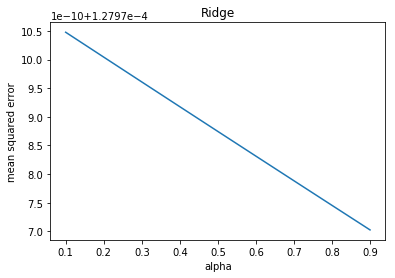

In [27]:
alphas = [x * 0.1 for x in range(1, 10)]
ridges = [metrics.mean_squared_error(linear_model.Ridge(alpha = a).fit(X, Z).predict(Xt), Zt) for a in alphas]
ridges = Series(ridges, index = alphas)
ridges.plot(title = "Ridge")
plt.xlabel("alpha")
plt.ylabel("mean squared error")